## REPORTE DE MEDIOS

luiselopezl12@gmail.com |  Visita mi página web -> https:/bento.me/luisdata

El reporte de medios se basa en extraer información de la web mediante motores de búsqueda (palabras clave). De esta manera se puede analizar el número de publicaciones por medio de comunicación, autor, fecha y hora. Además, se complementa con nube de palabras y un análisis de sentimiento, es decir, se identifica la polaridad que emanan las primeras 200 palabras del cuerpo del texto mediante un algoritmo computacional. 

Los datos es extraen con motores de búsqueda que pueden ser modificados, sin embargo, se extraen las noticias del día anterior a la fecha del reporte. 



In [102]:
# Módulo para extracción de datos (propio)
from get_data import get_newsapi_data 
# Módulo para transformación de texto (propio)
from transform_text_data import text_transform
# Módulo para obtener sentimiento de la descripción de la noticia (propio)
from get_sentiment import sentiment_analysis
# Módulo para trabajar con dataframes
import pandas as pd
# Módulo para nube de palabras
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Módulo para añadir imagen a la nube de palabras
from PIL import Image
# Módulos para gráficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
#Motores de búsqueda
query = ['AICM','ASUR']

### NÚMERO DE ARTÍCULOS POR MEDIO DE COMUNICACIÓN

En este apartado se muestra una gráfica de barras que tiene en el eje 'x' al medio de comunicación y en el eje 'y' el número de publicaciones que realizo el día anterior. Se puede observar que medio es el que interactúa más con los motores de búsqueda

In [104]:
data = get_newsapi_data(query)
data = data.drop('source', axis = 1).join(pd.DataFrame(data.source.values.tolist())) #Obtener fuente de datos

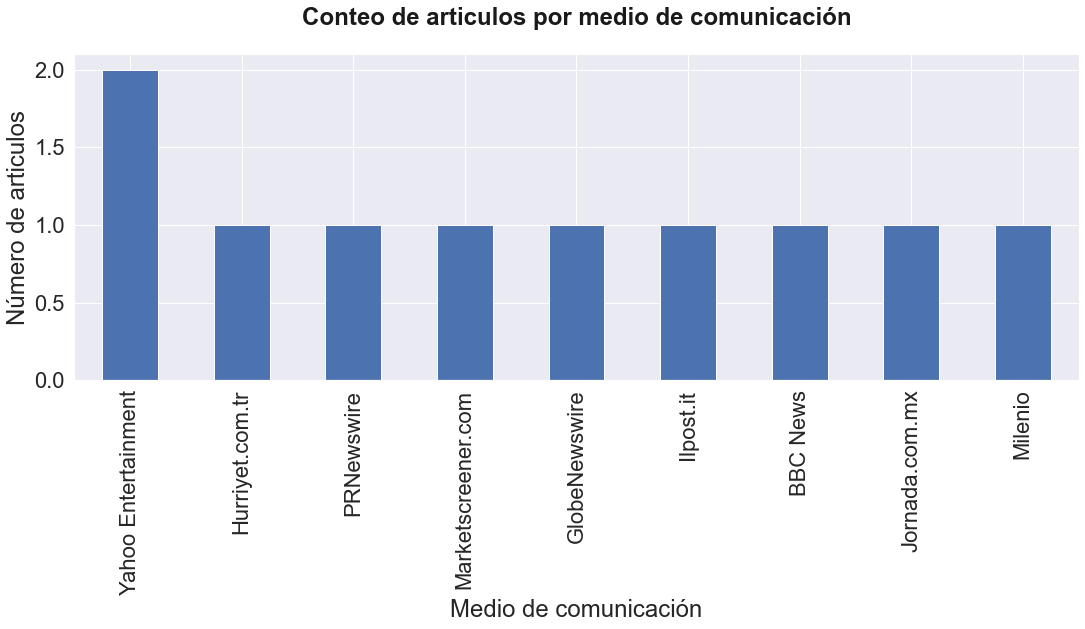

In [105]:
#Gráfica de barras
sns.set(font_scale=2)
data['name'].value_counts().plot(kind='bar', figsize = (18,6))
plt.xlabel('Medio de comunicación')
plt.ylabel('Número de articulos')
plt.title('Conteo de articulos por medio de comunicación',color = 'k', fontweight = 'bold', y = 1.07)
plt.show()

### ¿A QUÉ HORA PUBLICAN LOS MEDIOS DE COMUNICACIÓN?

La gráfica se conoce como mapa de calor y tiene la labor de mostrar la interacción entre dos variables. En este caso, la hora del día que se hizo una publicación y el medio de comunicación. Un color más intenso significa que en esa hora y medio de comunicación es más frecuente encontrar artículos relacionados con motores de búsqueda.

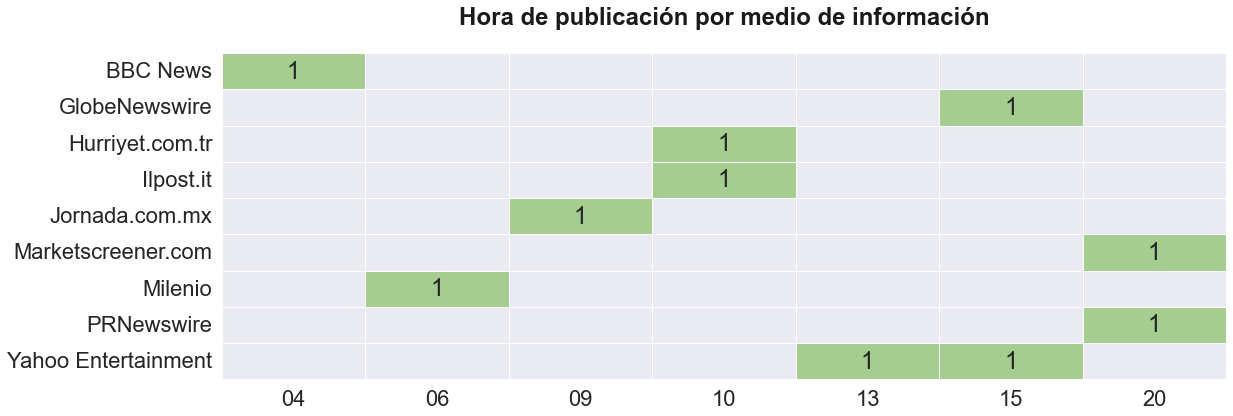

In [106]:
data['hour'] = data['publishedAt'].str.slice(11,13) #Extraer hora de publicación
#Mapa de calor
sns.set(font_scale=2)
plt.figure(figsize=(18,6))
glue = data.groupby(['name','hour']).size().sort_values(ascending=False).reset_index(name='count')
glue = glue.pivot('name','hour','count')
heat_map = sns.heatmap(glue, annot = True, linewidth = 0.5, cbar = False, cmap = 'crest')
plt.xlabel('')
plt.ylabel('')
plt.title('Hora de publicación por medio de información', color = 'k', fontweight = 'bold', y = 1.07)
plt.show()

### PALABRAS MÁS FRECUENTES EN LOS ARTÍCULOS

La visualización en forma de avión, muestra las palabras más frecuentes en los artículos; se puede identificar si hay algún tema específico para trabajar sobre él.

In [107]:
data = text_transform(data)

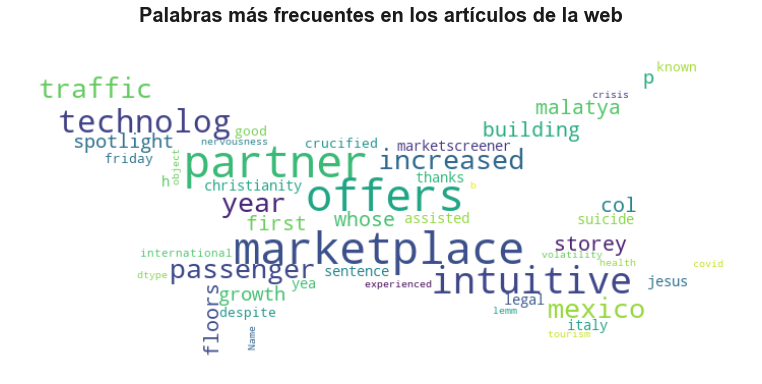

In [108]:
#WordCloud
text = data['lemm']
mask = np.array(Image.open('/Users/Luis/Downloads/Github/News/airplane.jpeg'))
wc = WordCloud(stopwords=text,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]).generate(str(text))

sns.set(font_scale=2)
fig = plt.figure(figsize = (18, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('Palabras más frecuentes en los artículos de la web', 
          fontsize =20, color = 'k', fontweight = 'bold', y = 1.07 )
plt.show()

### ¿AL LEER EL ARTÍCULO, ME EVOCA UN SENTIMIENTO NEGATIVO O POSITIVO?

El análisis de sentimiento es una manera de interpretar el texto de los artículos, para lograrlo se hace una transformación en la descripción de la noticia y se traduce al inglés; porque el módulo identifica mejor los sentimientos. 

Para mayor información sobre el proceso del algoritmo, dar clik aquí-> https://www.nltk.org 

**En esta gráfica se pueden identificar el número de artículos según el sentimiento que evocaron**

In [109]:
data = sentiment_analysis(data)

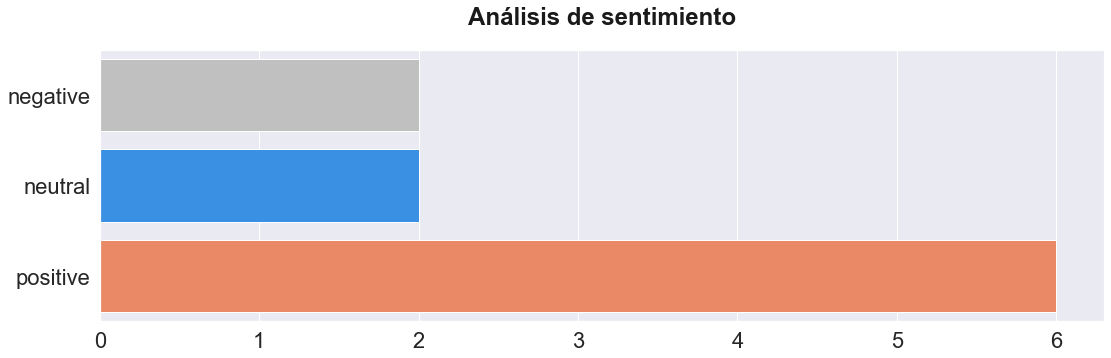

In [110]:
sns.set(font_scale=2)
plt.figure(figsize=(18,5))

sns.countplot( data=data, y='sentiment', palette=['silver','dodgerblue', 'coral'])
plt.ylabel('')
plt.xlabel('')
plt.title('Análisis de sentimiento' , color = 'k', fontweight = 'bold', y = 1.07)
plt.show()

### LOS MEDIOS DE COMUNICACIÓN Y SU SENTIMIENTO

En la última gráfica se visualiza un mapa de calor con el medio de comunicación en 'x' y el sentimiento en 'y'. Se puede observar la interacción de los sentimientos con el medio de comunicación. En esta última parte, se puede identificar con el paso de los días (comparación de reportes) sí hay algún medio que no cambié su sentimiento con los motores de búsqueda

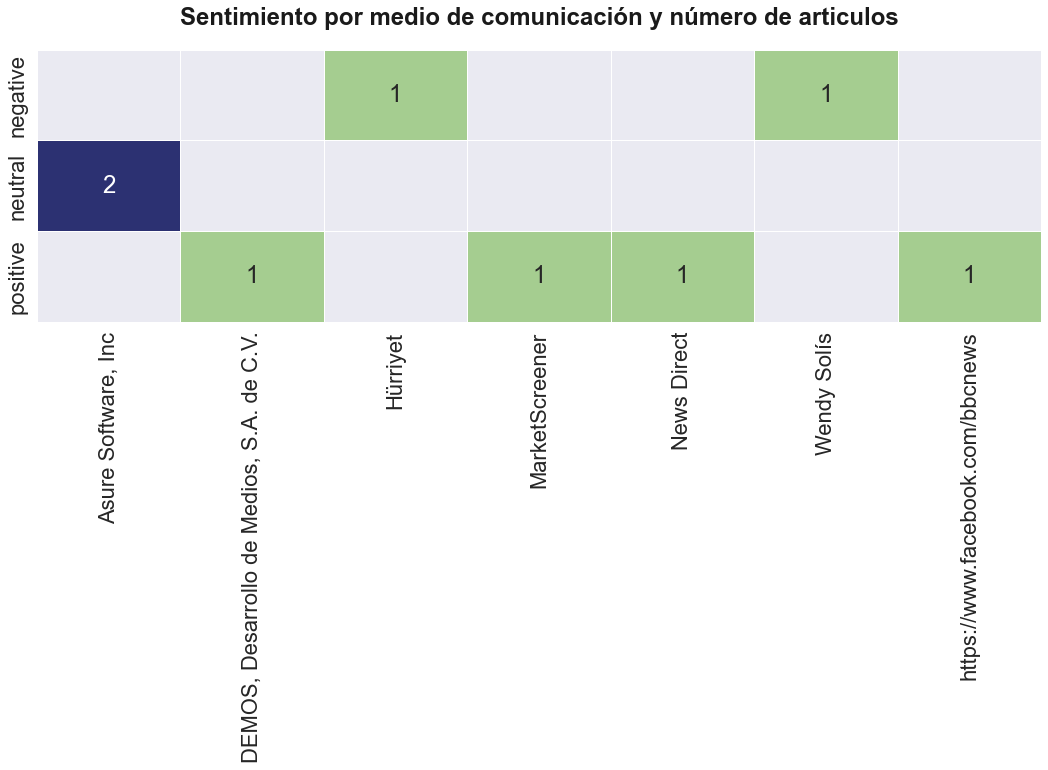

In [111]:
sns.set(font_scale=2)
plt.figure(figsize=(18,5))
glue = data.groupby(['sentiment','author']).size().sort_values(ascending=False).reset_index(name='count')
glue = glue.pivot('sentiment','author','count')
heat_map = sns.heatmap(glue, annot = True, linewidth = 0.5, cbar = False, cmap = 'crest')
plt.xlabel('')
plt.ylabel('')
plt.title('Sentimiento por medio de comunicación y número de articulos', color = 'k', fontweight = 'bold', y = 1.07 )
plt.show()